In [2]:
pip install asyncpraw nltk wordcloud matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 4.3 MB/s eta 0:00:00


In [3]:
import asyncpraw
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
# Download NLTK stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
import re
import string

In [15]:
def clean_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only letters and spaces

    # Remove unwanted single-character words (optional)
    text = ' '.join([word for word in text.split() if len(word) > 2])

    # Convert to lowercase
    text = text.lower()

    return text

Top Trending Keywords:
data: 833
engineer: 734
remote: 520
hiringusd: 478
senior: 371
software: 162
learning: 133
states: 133
engineering: 128
united: 127
scientist: 124
machine: 113
principal: 100
architect: 100
hiringcad: 83
new: 82
crypto: 77
job: 75
usa: 72
staff: 71


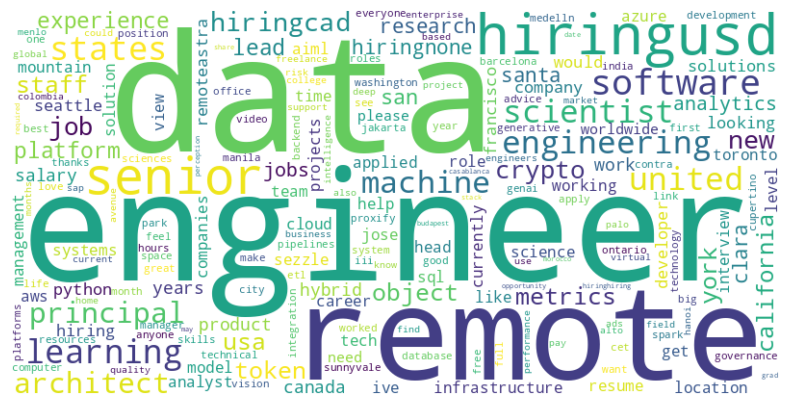

In [24]:
# Define the async function to fetch posts and extract keywords
async def fetch_trending_keywords(subreddit_name):
    async with asyncpraw.Reddit(
        client_id="a5r07Y8r-lk2noajjXq7PQ",         # Replace with your client ID
        client_secret="idDocmmQlmvmP_xkU_sokVH0w52pOg", # Replace with your client secret
        user_agent="MyRedditKWScript/1.0 by u/bala_official"
    ) as reddit:

        # Access the subreddit
        subreddit = await reddit.subreddit(subreddit_name)

        # Initialize an empty list to store the post titles and content
        posts_text = []

        # Fetch the top 1000 hot posts from the subreddit
        async for post in subreddit.hot(limit=1000):
            # Combine the title and selftext (post content)
            combined_text = post.title + " " + (post.selftext if post.selftext else "")
            posts_text.append(clean_text(combined_text))  # Clean and add to list

        # Join all the text into one large string
        all_text = ' '.join(posts_text)

        # Tokenize the text into words
        words = all_text.split()

        # Remove stopwords and non-alphabetic words
        stop_words = set(stopwords.words('english'))
        filtered_words = [word for word in words if word not in stop_words]

        # Count the frequency of each word
        word_counts = Counter(filtered_words)

        # Get the top 20 most common words
        top_keywords = word_counts.most_common(20)
        print("Top Trending Keywords:")
        for keyword, count in top_keywords:
            print(f"{keyword}: {count}")

        # Generate a word cloud from the keywords
        wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)

        # Display the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()

# Run the async function to fetch trending keywords for the 'python' subreddit
await fetch_trending_keywords("dataengineeringjobs")